# BIRD SPECIES CLASSIFICATION with DEEP LEARNING

## 1. Become one with the data

In [2]:
import os 
import cv2
#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [4]:
num_of_bird_groups = len(os.listdir("data/train"))
num_of_bird_groups

118

In [5]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


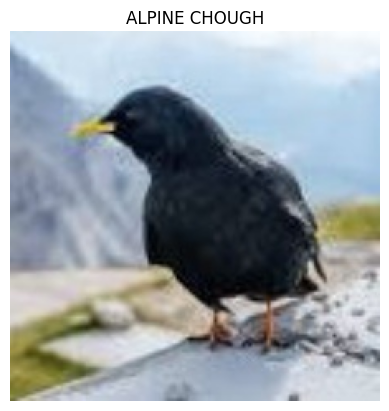

In [8]:
img = view_random_image(target_dir = "data/train/",
                        target_class = "ALPINE CHOUGH") # or we can write nike instead of converse to see converse examples

In [9]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


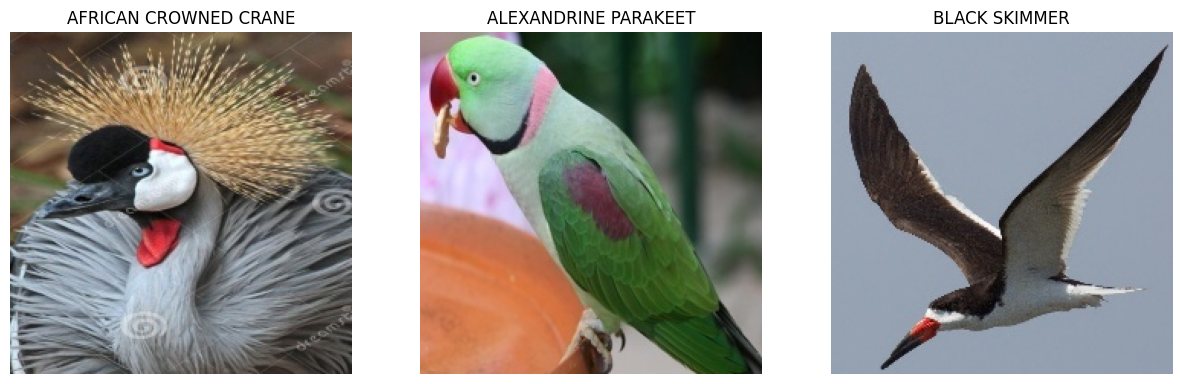

In [11]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("data/train/", "AFRICAN CROWNED CRANE")
plt.subplot(1,3,2)
pizza_image = view_random_image("data/train/", "ALEXANDRINE PARAKEET")
plt.subplot(1,3,3)
pizza_image = view_random_image("data/train/", "BLACK SKIMMER")

Data Preprocessing

In [12]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [13]:
train_dir = "data/train/"
test_dir = "data/test/"
val_dir = "data/valid/"

In [ ]:
ImageDataGenerator(rescale = 1./255)
(300,300)

In [14]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")


Found 18748 images belonging to 118 classes.
Found 590 images belonging to 118 classes.
Found 590 images belonging to 118 classes.


## 3.Creating and fitting the Model

In [16]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")



#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(118, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


586/586 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.5535 - loss: 2.8124 - val_accuracy: 0.8438 - val_loss: 0.7595
Epoch 2/10


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.6740
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.8362 - loss: 0.8792 - val_accuracy: 0.8750 - val_loss: 0.7888
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8984 - val_loss: 0.4830
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 700s 1s/step - accuracy: 0.8771 - loss: 0.6471 - val_accuracy: 0.8077 - val_loss: 0.9219
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 1.0997
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 705s 1s/step - accuracy: 0.8958 - loss: 0.5964 - val_accuracy: 0.8984 - val_loss: 0.5423
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8672 - val_loss: 0.9421
Epoch 9/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 701s 1s/step - accuracy: 0.9092 - loss: 

In [17]:
model_0.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input-layer (InputLayer)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 118)            │       241,782 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,528,132 (85.94 MB)

 Trainable params: 241,782 (944.46 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 483,566 (1.84 MB)

In [18]:
model_0.evaluate(test_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9111 - loss: 0.4842


[0.5648970603942871, 0.9050847291946411]

In [19]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

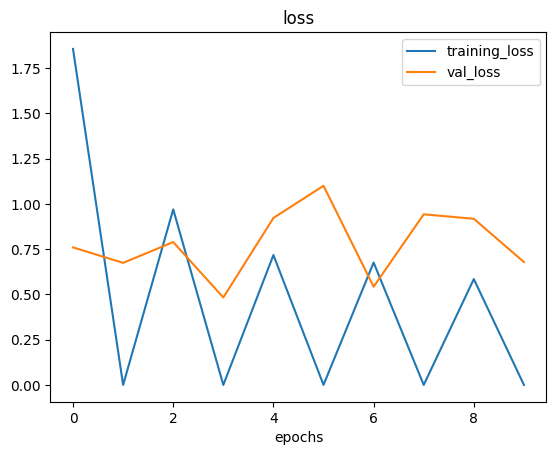

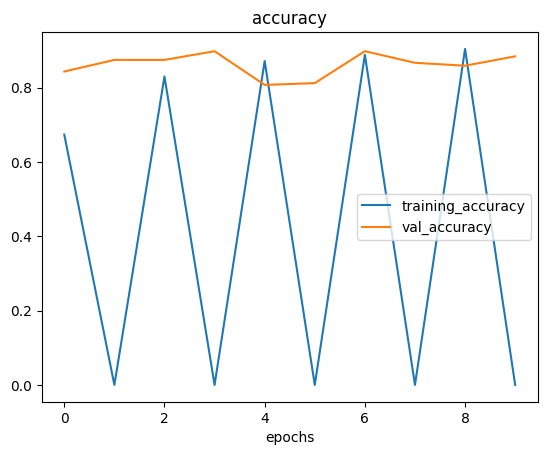

In [20]:
plot_loss_curves(history)

In [64]:
import os

# Specify the path to save the model
file_path = os.path.join('models', 'V1-imageclassifier.keras')

# Delete the existing model directory if it exists
if os.path.exists(file_path):
    try:
        os.rmdir(file_path)
        print(f"Existing model directory '{file_path}' deleted successfully.")
    except Exception as e:
        print(f"Error deleting existing model directory '{file_path}': {e}")

# Save the model in the native Keras format
try:
    model_0.save(file_path)
    print(f"Model saved to '{file_path}' successfully.")
except Exception as e:
    print(f"Error saving model to '{file_path}': {e}")


Model saved to 'models\V1-imageclassifier.keras' successfully.


c:\Users\jmare\OneDrive\Documents\Clicker\.conda\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 192 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


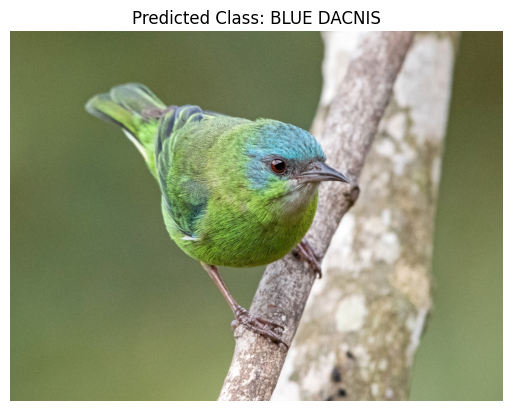

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from tensorflow.keras.preprocessing import image

def load_and_process_image(image_path, target_size=(300, 300)):
    try:
        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError("Image file not found or cannot be read.")
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Convert the image to array format and rescale its pixel values
        img = img / 255.0
        # Expand dimensions to create a batch of size 1
        img = np.expand_dims(img, axis=0)
        return img
    except Exception as e:
        print("Error loading and processing image:", e)
        return None

def predict_and_plot_single_image(model, image_path, class_names):
    # Load and preprocess the image
    img = load_and_process_image(image_path)
    # Predict the class probabilities
    predictions = model.predict(img)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    # Get the predicted class name
    predicted_class_name = class_names[predicted_class_index]
    
    # Read the image in RGB color space
    img_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.imshow(img_rgb)
    plt.title(f"Predicted Class: {predicted_class_name}")
    plt.axis("off")
    plt.show()

# Example usage:
    
loaded_model = tf.keras.models.load_model('models/V1-imageclassifier.keras')

image_path = "data/buffledacnis2.jpg"
predict_and_plot_single_image(loaded_model, image_path, class_names)
